In [1]:
#import packages
import pandas as pd
import geopandas as gpd
import requests
from shapely.geometry import shape, Point
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request, json
import requests
import urllib.parse
import datetime

import warnings
warnings.filterwarnings('ignore')

### NYC Open Data:
    
Subway and Bus Stops SODA API Urls:

* Subway: `https://data.cityofnewyork.us/resource/kk4q-3rt2.json`
* Bus: `https://data.cityofnewyork.us/resource/t4f2-8md7.json`

Supporting Shapefiles:

* U.S. Census Tracts 2020: `https://data.cityofnewyork.us/resource/63ge-mke6.json`

In [13]:
subwayurl =  'https://data.cityofnewyork.us/resource/kk4q-3rt2.json'
busurl = 'https://data.cityofnewyork.us/resource/t4f2-8md7.json'

query = (subwayurl+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())

for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
subway_gdf = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
subway_gdf = subway_gdf.drop(columns = ['the_geom'])
subway_gdf.head()

,url,objectid,name,line,notes,geometry
0,http://web.mta.info/nyct/service/,1,Astor Pl,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-73.99107 40.73005)
1,http://web.mta.info/nyct/service/,2,Canal St,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",POINT (-74.00019 40.71880)
2,http://web.mta.info/nyct/service/,3,50th St,1-2,"1-all times, 2-nights",POINT (-73.98385 40.76173)
3,http://web.mta.info/nyct/service/,4,Bergen St,2-3-4,"4-nights, 3-all other times, 2-all times",POINT (-73.97500 40.68086)
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,3-4,"4-nights, 3-all other times",POINT (-73.89489 40.66471)


In [14]:
query = (busurl+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())

for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
bus_gdf = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
bus_gdf = bus_gdf.drop(columns = ['the_geom'])
bus_gdf.head()

,boro_code,boro_name,boro_cd,coun_dist,assem_dist,st_sen_dist,cong_dist,shelter_id,corner,on_street,cross_stre,longitude,latitude,ntaname,femafldz,femafld_t,hrc_evac,geometry
0,3,Brooklyn,317,45,42,21,9,BR02218,SW,AV D,NOSTRAND AV,-73.948745,40.640863,East Flatbush-Erasmus,X,AREA OF MINIMAL FLOOD HAZARD,5,POINT (-73.94874 40.64085)
1,3,Brooklyn,310,43,46,26,11,BR02219,SW,5 AV,BAY RIDGE PKWY,-74.022837,40.629253,Bay Ridge,X,AREA OF MINIMAL FLOOD HAZARD,NaN,POINT (-74.02284 40.62924)
2,3,Brooklyn,308,41,55,20,9,BR02220,SE,ST MARKS AV,BUFFALO AV,-73.924674,40.673767,Crown Heights (North),X,AREA OF MINIMAL FLOOD HAZARD,NaN,POINT (-73.92467 40.67376)
3,3,Brooklyn,315,48,45,23,8,BR02221,SW,ORIENTAL BLVD,MACKENZIE ST,-73.940136,40.578042,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1,POINT (-73.94013 40.57803)
4,3,Brooklyn,315,48,45,23,8,BR02222,SW,ORIENTAL BLVD,MACKENZIE ST,-73.939918,40.578065,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1,POINT (-73.93992 40.57806)


In [15]:
len(bus_gdf)

3330

In [16]:
len(subway_gdf)

473

In [17]:
#save raw points data into shapefile
bus_gdf.to_file('../Data/bus_stop_shelter.shp')
subway_gdf.to_file('../Data/subway_stations.shp')

In [22]:
#import tracts
tractsurl = 'https://data.cityofnewyork.us/resource/63ge-mke6.json'
query = (tractsurl+'?'
        "$select=*"
        "&$limit=10000")
query = query.replace(" ", "%20")
response = urllib.request.urlopen(query)
data = json.loads(response.read())

for d in data:
    d['geometry'] = shape(d['the_geom'])

#store in a geodataframe
tracts_gdf = gpd.GeoDataFrame(data, geometry = 'geometry', crs = 'EPSG: 4326')
tracts_gdf = tracts_gdf.drop(columns = ['the_geom'])
tracts_gdf.head()

,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,geoid,shape_leng,shape_area,geometry
0,1,1,Manhattan,000100,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.0485015,1844421.2457,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,2.01,1,Manhattan,000201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.49524739,972312.140355,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ..."
2,6,1,Manhattan,000600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.28645635,2582705.23446,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ..."
3,14.01,1,Manhattan,001401,1001401,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.33199978,1006116.58429,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ..."
4,14.02,1,Manhattan,001402,1001402,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.1560187,1226206.24719,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ..."


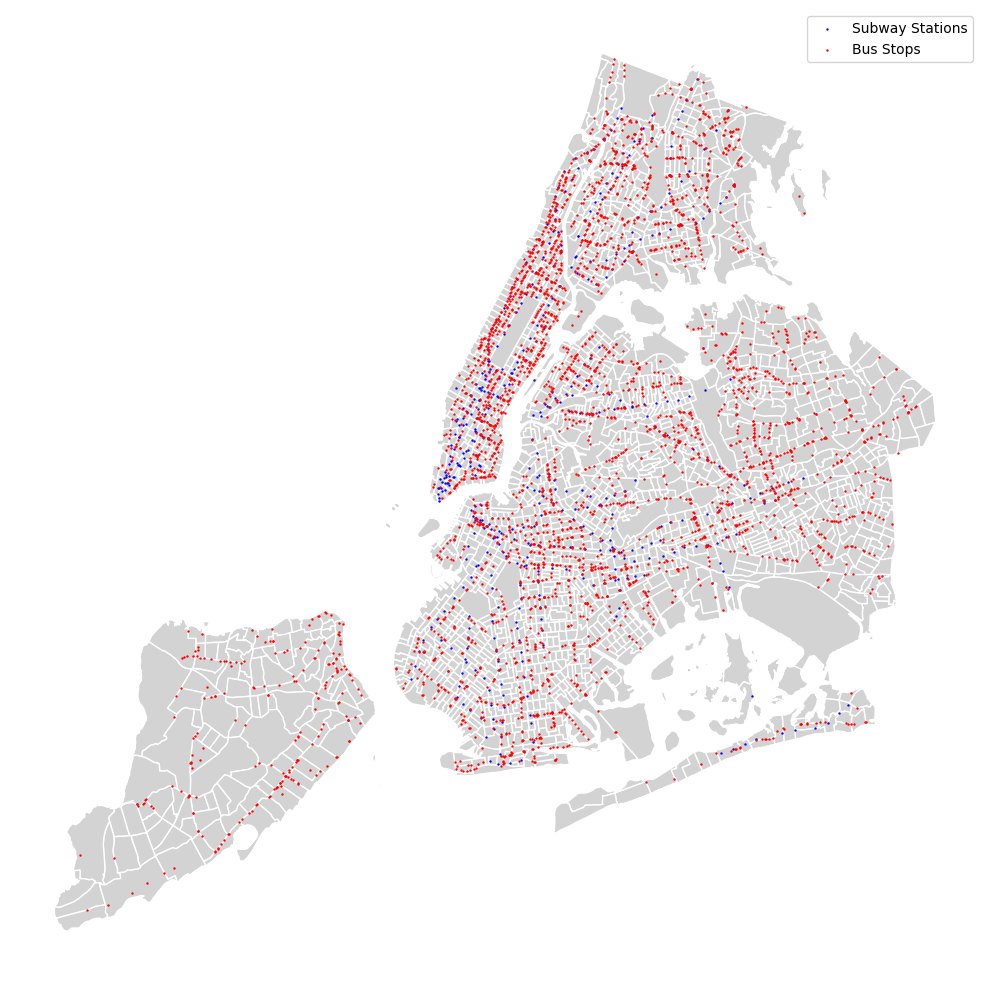

In [29]:
#plot
fig, ax = plt.subplots(figsize = (10,10))
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'white')
subway_gdf.plot(ax = ax, markersize = .5, color = 'b', label = 'Subway Stations')
bus_gdf.plot(ax = ax, markersize = .5, color = 'r', label = 'Bus Stops')
plt.legend()
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()
plt.savefig('../Outputs/NYC_Bus_Subway_Stops.png')

### Creating Buffer and Calculating Accessible Tracts:

I will adapt the concepts of the '15 minute city' to calculate an appropriate buffer zone around each subway and bus stop. This aims to include any census tract that is within a reasonable and accessible distance from public transportation, within 15 minutes **on foot**.

As seen in Transform Transport's [research](https://transformtransport.org/research/livable-streets/walkability-and-the-15-minute-city-model-an-integrated-approach-for-the-city-of-milan/) and well as many other urban research, walkability not only depends on usefulness but safetly and comfort of the walking route. These additional ascpets should be taken into consideration throughout our work. It is also important to note varying levels of ability when defining measures of accessibility. While a younger resident in good health might find a public transit stop 1 mile from their resident accessible, another person of a different demographic might not.

According to [this](https://www.researchgate.net/publication/344166318_Walkability_Index_for_Elderly_Health_A_Proposal) article, an elderly community member takes approximately 13 minutes and 53s to walk 500 meters. I believe setting our buffer to roughly 500 meters should allow for most members of the community within that zone to reach the nearest station or stop within 15 minutes.

In [ ]:
#add 500 ft around each shape
subway_gdf = subway_gdf.to_crs('EPSG:32118') # Use an appropriate projected system for your area
subway_gdf['buffer_distance'] = 500 # in meters
buffered_gdf = pd.DataFrame()

for index, row in subway_gdf.iterrows():
    polygon = row.geometry
    buffer_distance = row.buffer_distance
    buffered_polygon = polygon.buffer(buffer_distance, cap_style=1)
    buffered_gdf = buffered_gdf.append({'geometry': buffered_polygon}, ignore_index=True)
    
subway_buff = gpd.GeoDataFrame(buffered_gdf,crs = subway_gdf.crs)
subway_gdf = subway_gdf.to_crs('EPSG:4326') # Use an appropriate projected system for your area

In [128]:
subway_buff_full = pd.merge(subway_gdf.iloc[:,:-2],subway_buff, left_index=True, right_index=True)
subway_buff_full = gpd.GeoDataFrame(subway_buff_full,geometry = 'geometry', crs = 'EPSG:4326')
subway_buff_full.head()

,url,objectid,name,line,notes,geometry
0,http://web.mta.info/nyct/service/,1,Astor Pl,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...","POLYGON ((-73.98515 40.73005, -73.98518 40.729..."
1,http://web.mta.info/nyct/service/,2,Canal St,4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...","POLYGON ((-73.99428 40.71880, -73.99430 40.718..."
2,http://web.mta.info/nyct/service/,3,50th St,1-2,"1-all times, 2-nights","POLYGON ((-73.97793 40.76173, -73.97796 40.761..."
3,http://web.mta.info/nyct/service/,4,Bergen St,2-3-4,"4-nights, 3-all other times, 2-all times","POLYGON ((-73.96908 40.68086, -73.96911 40.680..."
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,3-4,"4-nights, 3-all other times","POLYGON ((-73.88897 40.66471, -73.88900 40.664..."


In [99]:
#add 500 ft around each shape
bus_gdf = bus_gdf.to_crs('EPSG:32118') # Use an appropriate projected system for your area
bus_gdf['buffer_distance'] = 500 # in meters
buffered_gdf = pd.DataFrame()

for index, row in bus_gdf.iterrows():
    polygon = row.geometry
    buffer_distance = row.buffer_distance
    buffered_polygon = polygon.buffer(buffer_distance, cap_style=1)
    buffered_gdf = buffered_gdf.append({'geometry': buffered_polygon}, ignore_index=True)
    
bus_buff = gpd.GeoDataFrame(buffered_gdf,crs = bus_gdf.crs)
bus_gdf = bus_gdf.to_crs('EPSG:4326') # Use an appropriate projected system for your area

In [127]:
bus_buff_full = pd.merge(bus_gdf.iloc[:,:-2],bus_buff, left_index=True, right_index=True)
bus_buff_full = gpd.GeoDataFrame(bus_buff_full,geometry = 'geometry', crs = 'EPSG:4326')
bus_buff_full.head()

,boro_code,boro_name,boro_cd,coun_dist,assem_dist,st_sen_dist,cong_dist,shelter_id,corner,on_street,cross_stre,longitude,latitude,ntaname,femafldz,femafld_t,hrc_evac,geometry
0,3,Brooklyn,317,45,42,21,9,BR02218,SW,AV D,NOSTRAND AV,-73.948745,40.640863,East Flatbush-Erasmus,X,AREA OF MINIMAL FLOOD HAZARD,5,"POLYGON ((-73.94283 40.64085, -73.94286 40.640..."
1,3,Brooklyn,310,43,46,26,11,BR02219,SW,5 AV,BAY RIDGE PKWY,-74.022837,40.629253,Bay Ridge,X,AREA OF MINIMAL FLOOD HAZARD,NaN,"POLYGON ((-74.01693 40.62925, -74.01695 40.628..."
2,3,Brooklyn,308,41,55,20,9,BR02220,SE,ST MARKS AV,BUFFALO AV,-73.924674,40.673767,Crown Heights (North),X,AREA OF MINIMAL FLOOD HAZARD,NaN,"POLYGON ((-73.91876 40.67375, -73.91879 40.673..."
3,3,Brooklyn,315,48,45,23,8,BR02221,SW,ORIENTAL BLVD,MACKENZIE ST,-73.940136,40.578042,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1,"POLYGON ((-73.93423 40.57803, -73.93426 40.577..."
4,3,Brooklyn,315,48,45,23,8,BR02222,SW,ORIENTAL BLVD,MACKENZIE ST,-73.939918,40.578065,Sheepshead Bay-Manhattan Beach-Gerritsen Beach,X,AREA OF MINIMAL FLOOD HAZARD,1,"POLYGON ((-73.93401 40.57805, -73.93404 40.577..."


In [96]:
subway_buff = subway_buff.to_crs(4326)
subway_buff.head()

,geometry
0,"POLYGON ((-73.98515 40.73005, -73.98518 40.729..."
1,"POLYGON ((-73.99428 40.71880, -73.99430 40.718..."
2,"POLYGON ((-73.97793 40.76173, -73.97796 40.761..."
3,"POLYGON ((-73.96908 40.68086, -73.96911 40.680..."
4,"POLYGON ((-73.88897 40.66471, -73.88900 40.664..."


In [100]:
bus_buff = bus_buff.to_crs(4326)
bus_buff.head()

,geometry
0,"POLYGON ((-73.94283 40.64085, -73.94286 40.640..."
1,"POLYGON ((-74.01693 40.62925, -74.01695 40.628..."
2,"POLYGON ((-73.91876 40.67375, -73.91879 40.673..."
3,"POLYGON ((-73.93423 40.57803, -73.93426 40.577..."
4,"POLYGON ((-73.93401 40.57805, -73.93404 40.577..."


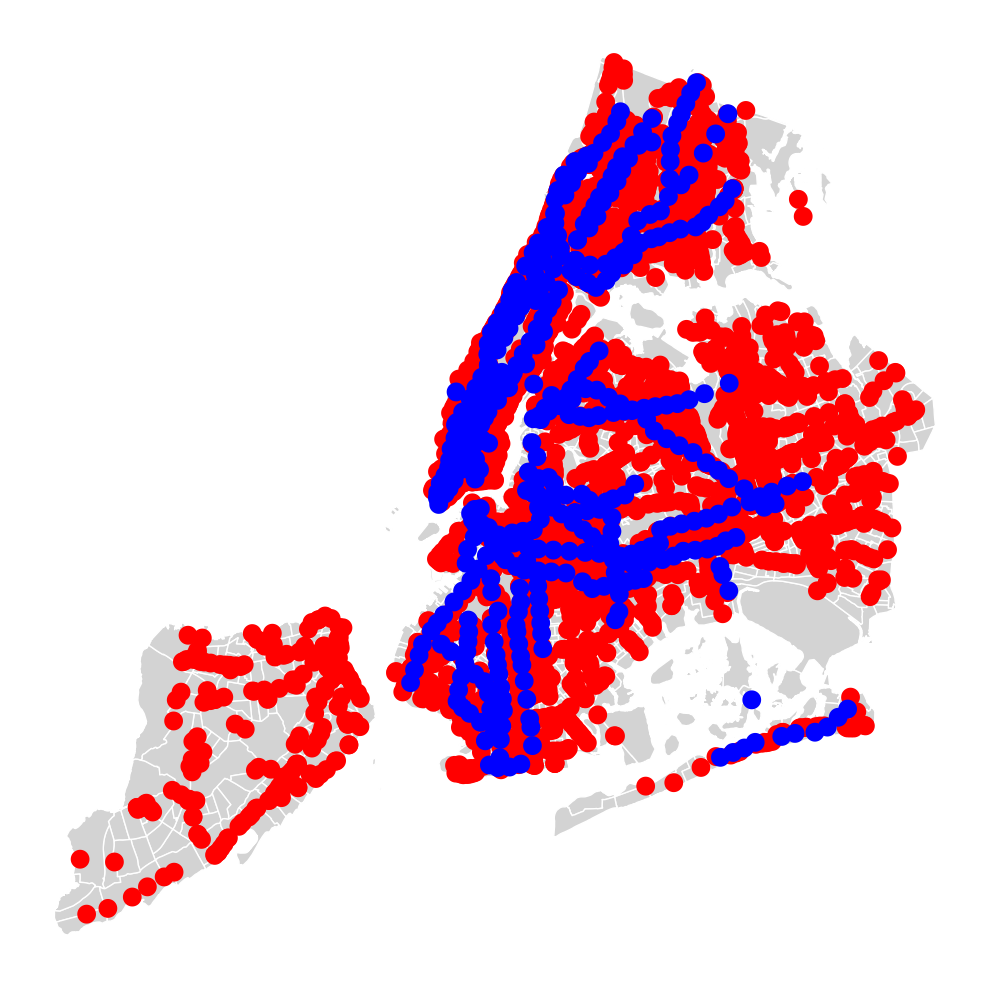

In [112]:
#plot
fig, ax = plt.subplots(figsize = (10,10))
tracts_gdf.plot(ax = ax, color = 'lightgrey', edgecolor = 'white')
bus_buff.plot(ax = ax, markersize = .5, color = 'r')
subway_buff.plot(ax = ax, markersize = .5, color = 'b')
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

In [129]:
#save buffer files
bus_buff_full.to_file('../Data/bus_stop_shelter_500m_buffer.shp')
subway_buff_full.to_file('../Data/subway_stations_500m_buffer.shp')

### Calculating Accessible Census Tracts

Main Q: Which Census Tracts overlap with a bus or subway buffer zone seen above?

In [132]:
bus_access = gpd.sjoin(tracts_gdf,bus_buff_full, predicate = 'intersects', how = 'left')

In [138]:
subway_access = gpd.sjoin(tracts_gdf,subway_buff_full, predicate = 'intersects', how = 'left')

In [139]:
print(len(bus_access),len(subway_access))

29444 5525


In [136]:
tract_access = pd.DataFrame(columns = ['geoid','Bus_Access','Subway_Access','Bus_Count','Subway_Count'])
tract_access['geoid'] = tracts_gdf['geoid'].unique()

In [137]:
tract_access.head()

,geoid,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,36061000100,NaN,NaN,NaN,NaN
1,36061000201,NaN,NaN,NaN,NaN
2,36061000600,NaN,NaN,NaN,NaN
3,36061001401,NaN,NaN,NaN,NaN
4,36061001402,NaN,NaN,NaN,NaN


In [170]:
geo_bus_dict = {}
for index, row in bus_access.iterrows():
    geoid = row.geoid
    bus_shelter = row.shelter_id
    #append to dictionary above
    if geoid not in geo_bus_dict:
        geo_bus_dict[geoid] = bus_shelter
    elif type(geo_bus_dict[geoid]) == list:
        geo_bus_dict[geoid].append(bus_shelter)
    else:
        geo_bus_dict[geoid] = [geo_bus_dict[geoid], bus_shelter]
        
#iterate through the dictionary to see which tracts have any bus stop and how many (e.g. Bus_Access and Bus_Count)
busaccess = []
buscount = []
for key,val in geo_bus_dict.items():
    #get df index for given key/geoid
    idx = tract_access.index[tract_access['geoid'] == key]
    if type(val) == float and pd.isna(val):
        print(key+' '+str(idx)+' Is Nan')
        #find column in df with key value and set to 0
        busaccess.append(0)
        buscount.append(0)
    else:
        #find column in df with key value and set to 1
        busaccess.append(1)
#         tract_access.iloc[idx]['Bus_Access'] = 1
        if type(val) == list:
            #count length and set it in the bus_count value
            count = len(val)
            print(key+' '+str(idx)+' Is List of length '+str(count))
            buscount.append(count)
#             tract_access.iloc[idx]['Bus_Count'] = count

        else:
            #bus_count value to 1
            print(key+' '+str(idx)+' Is 1 stop')
#             tract_access.iloc[idx]['Bus_Count'] = 1
            buscount.append(1)

36061000100 Int64Index([0], dtype='int64') Is Nan
36061000201 Int64Index([1], dtype='int64') Is List of length 23
36061000600 Int64Index([2], dtype='int64') Is List of length 25
36061001401 Int64Index([3], dtype='int64') Is List of length 26
36061001402 Int64Index([4], dtype='int64') Is List of length 30
36061001800 Int64Index([5], dtype='int64') Is List of length 28
36061002201 Int64Index([6], dtype='int64') Is List of length 33
36061002601 Int64Index([7], dtype='int64') Is List of length 21
36061002602 Int64Index([8], dtype='int64') Is List of length 21
36061002800 Int64Index([9], dtype='int64') Is List of length 28
36061003100 Int64Index([10], dtype='int64') Is List of length 20
36061003200 Int64Index([11], dtype='int64') Is List of length 39
36061003300 Int64Index([12], dtype='int64') Is List of length 13
36061003400 Int64Index([13], dtype='int64') Is List of length 36
36061003601 Int64Index([14], dtype='int64') Is List of length 18
36061003602 Int64Index([15], dtype='int64') Is Li

In [171]:
tract_access['Bus_Access'] = busaccess
tract_access['Bus_Count'] = buscount
tract_access.head()

,geoid,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,36061000100,0,NaN,0,NaN
1,36061000201,1,NaN,23,NaN
2,36061000600,1,NaN,25,NaN
3,36061001401,1,NaN,26,NaN
4,36061001402,1,NaN,30,NaN


In [196]:
subway_access.head()

,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,geoid,shape_leng,shape_area,geometry,index_right,url,objectid,name,line,notes
0,1,1,Manhattan,000100,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.0485015,1844421.2457,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",NaN,NaN,NaN,NaN,NaN,NaN
1,2.01,1,Manhattan,000201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.49524739,972312.140355,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",368.0,http://web.mta.info/nyct/service/,369,East Broadway,F,F-all times
1,2.01,1,Manhattan,000201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.49524739,972312.140355,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",10.0,http://web.mta.info/nyct/service/,11,Delancey St - Essex St,J-M-Z,"J-all times, M-all times exc nights, Z-rush ho..."
1,2.01,1,Manhattan,000201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.49524739,972312.140355,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",369.0,http://web.mta.info/nyct/service/,370,Delancey St - Essex St,F,F-all times
2,6,1,Manhattan,000600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.28645635,2582705.23446,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",368.0,http://web.mta.info/nyct/service/,369,East Broadway,F,F-all times


In [195]:
#repeat for subway
geo_subway_dict = {}
for index, row in subway_access.iterrows():
    geoid = row.geoid
    station = row.name
    #append to dictionary above
    if geoid not in geo_subway_dict:
        geo_subway_dict[geoid] = station
    elif type(geo_subway_dict[geoid]) == list:
        geo_subway_dict[geoid].append(station)
    else:
        geo_subway_dict[geoid] = [geo_subway_dict[geoid], station]
        
#iterate through the dictionary to see which tracts have any bus stop and how many (e.g. Bus_Access and Bus_Count)
access = []
count = []
for key,val in geo_subway_dict.items():
    #get df index for given key/geoid 
    if type(val) == int: #and val == np.nan:
        print(key+' Is Nan')
        #find column in df with key value and set to 0
        access.append(0)
        count.append(0)
    else:
        #find column in df with key value and set to 1
        access.append(1)
        if type(val) == list:
            #count length and set it in the bus_count value
            print(key+' Is List of length '+str(len(val)))
            count.append(len(val))
        else:
            #bus_count value to 1
            print(key+' Is 1 stop')
            count.append(1)

36061000100 Is Nan
36061000201 Is List of length 3
36061000600 Is List of length 4
36061001401 Is List of length 4
36061001402 Is List of length 4
36061001800 Is List of length 12
36061002201 Is List of length 2
36061002601 Is Nan
36061002602 Is Nan
36061002800 Is Nan
36061003100 Is List of length 19
36061003200 Is List of length 2
36061003300 Is List of length 15
36061003400 Is List of length 2
36061003601 Is List of length 9
36061003602 Is List of length 9
36061003700 Is List of length 9
36061003900 Is List of length 9
36061004001 Is List of length 5
36061004002 Is List of length 7
36061004100 Is List of length 11
36061004300 Is List of length 9
36061004500 Is List of length 12
36061005200 Is List of length 11
36061005400 Is List of length 11
36061005501 Is List of length 10
36061005502 Is List of length 8
36061005800 Is List of length 14
36061006300 Is List of length 11
36061006500 Is List of length 10
36061006700 Is List of length 5
36061006800 Is List of length 6
36061006900 Is Li

In [197]:
tract_access['Subway_Access'] = access
tract_access['Subway_Count'] = count
tract_access.head()

,geoid,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,36061000100,0,0,0,0
1,36061000201,1,1,23,3
2,36061000600,1,1,25,4
3,36061001401,1,1,26,4
4,36061001402,1,1,30,4


In [200]:
tracts_transport_info = pd.merge(tracts_gdf,tract_access, on = 'geoid', how = 'left')

In [201]:
len(tracts_transport_info)

2325

In [202]:
len(tracts_gdf)

2325

In [203]:
tracts_transport_info.head()

,ctlabel,borocode,boroname,ct2020,boroct2020,ntaname,nta2020,cdta2020,cdtaname,geoid,shape_leng,shape_area,geometry,Bus_Access,Subway_Access,Bus_Count,Subway_Count
0,1,1,Manhattan,000100,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,11023.0485015,1844421.2457,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",0,0,0,0
1,2.01,1,Manhattan,000201,1000201,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.49524739,972312.140355,"MULTIPOLYGON (((-73.98450 40.70951, -73.98655 ...",1,1,23,3
2,6,1,Manhattan,000600,1000600,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.28645635,2582705.23446,"MULTIPOLYGON (((-73.99022 40.71440, -73.98934 ...",1,1,25,4
3,14.01,1,Manhattan,001401,1001401,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.33199978,1006116.58429,"MULTIPOLYGON (((-73.98837 40.71645, -73.98754 ...",1,1,26,4
4,14.02,1,Manhattan,001402,1001402,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.1560187,1226206.24719,"MULTIPOLYGON (((-73.98507 40.71908, -73.98423 ...",1,1,30,4


In [204]:
tracts_transport_info.to_csv('../Data/tracts_subway_bus_access.csv')